<a href="https://colab.research.google.com/github/edoaurahman/PCVK/blob/main/Week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Menghubungkan ke Google Drive

In [174]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Menampilkan Gambar dari Drive

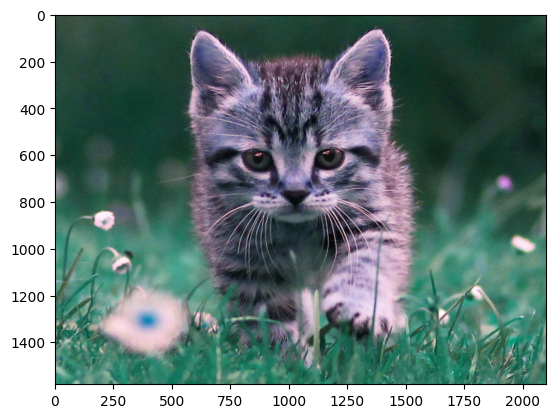

In [175]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

img = cv.imread("/content/drive/MyDrive/PCVK_MM/Images/kitten01.jpg")
plt.imshow(img)

Menampilkan gambar dalam format warna RGB

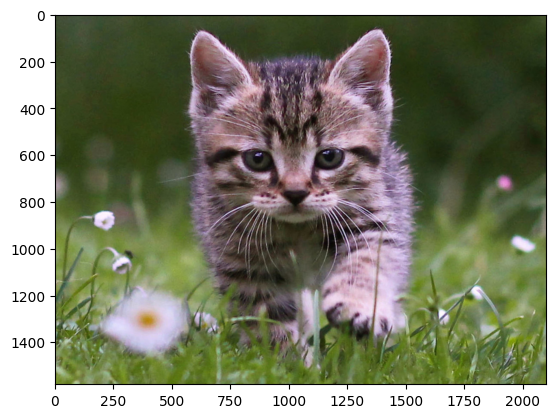

In [176]:
img2 = img
img3 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img3)

3. Menampilkan citra Grayscale, melakukan resizing, melakukan Flipping, Menyimpan citra hasil

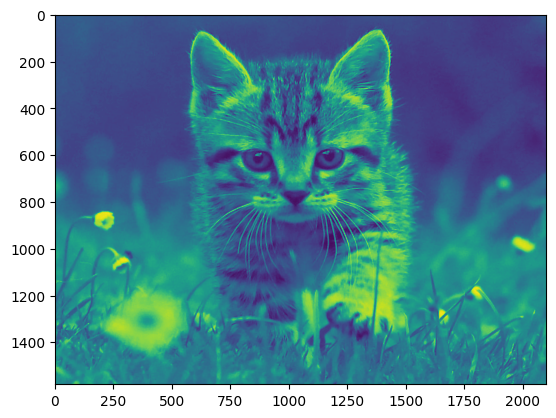

In [177]:
img_gray = cv.imread("/content/drive/MyDrive/PCVK_MM/Images/kitten01.jpg", cv.IMREAD_GRAYSCALE)
plt.imshow(img_gray)

Dari citra grayscale, selanjutnya dipilih untuk ditampilkan colormap dengan warna 'gray'

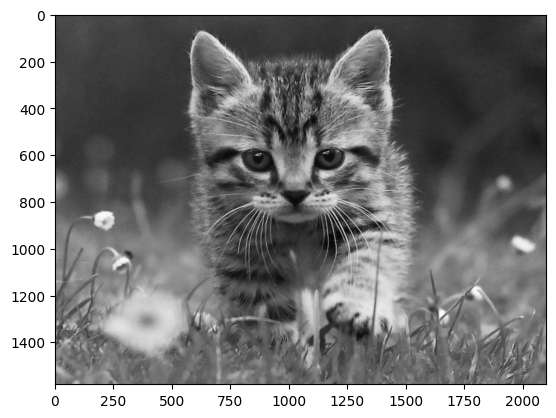

In [178]:
plt.imshow(img_gray, cmap='gray')

Dari citra grayscale, selanjutnya dipilih untuk ditampilkan colormap dengan warna 'magma'

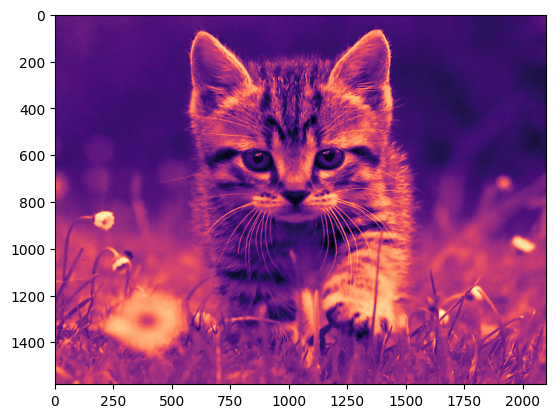

In [179]:
plt.imshow(img_gray, cmap='magma')

Citra RGB di resize dalam ukuran panjang 512 dan lebar 1024

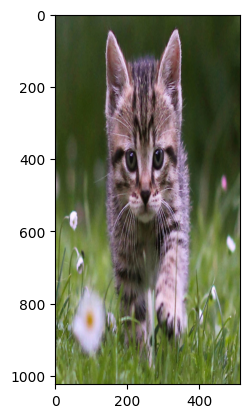

In [180]:
img4 = cv.resize(cv.cvtColor(img,cv.COLOR_BGR2RGB), (512,1024))
plt.imshow(img4)

Citra RGB ditampilkan dalam ukuran yang lebih besar dengan posisi gambar terbalik

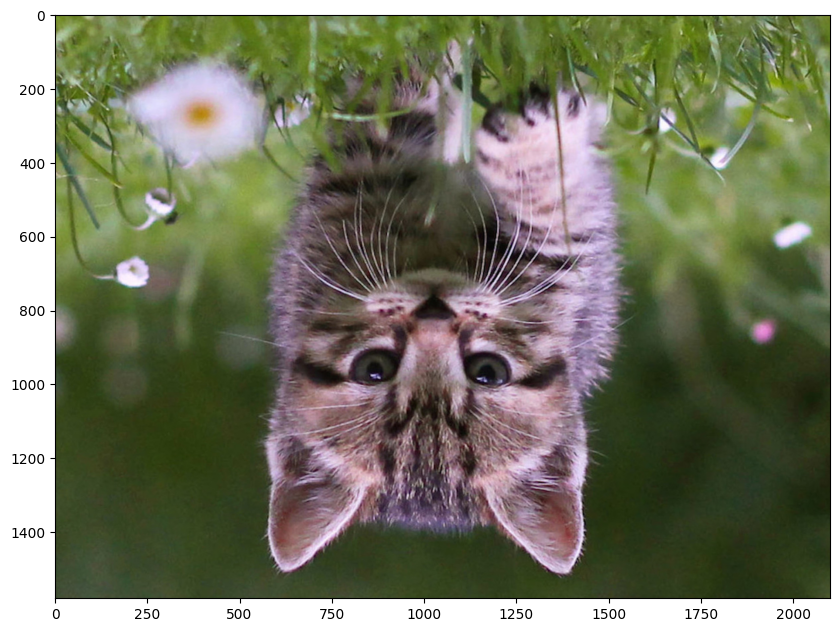

In [181]:
img5 = cv.flip(cv.cvtColor(img, cv.COLOR_BGR2RGB), 0)

# simpan File image
# cv.imwrite("/content/drive/MyDrive/PCVK_MM/Images/mandrill2.tiff", img5)

# tampilkan plot dengan ukuran canvas yang lebih besar
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.imshow(img5)

4. Membuat bentuk Geometri 2D dari OpenCV. Diawali dengan pembuatan black image dengan tipe data int16.

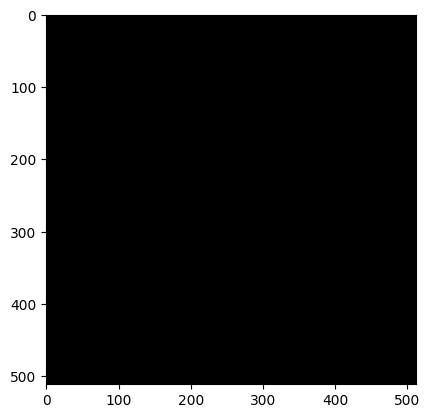

In [182]:
black_img = np.zeros((512,512,3), dtype=np.int16)
plt.imshow(black_img)

Kemudian menambahkan bentuk persegi panjang sesuai koordinat pt1 dan pt2

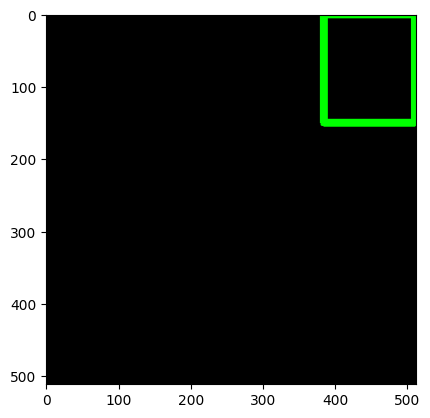

In [183]:
# perhatikan koordinat titik pt1 dan pt2
cv.rectangle(black_img, pt1=(384,0), pt2=(510,150), color=(0,255,0), thickness=10)
plt.imshow(black_img)

Selanjutnya ditambah menambahkan bentuk persegi sesuai koordinat pt1 dan pt2 yang tertulis pada kode program.

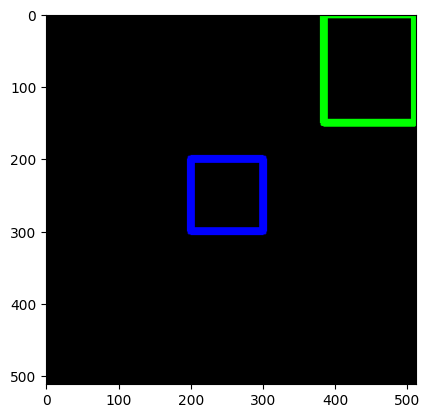

In [184]:
cv.rectangle(black_img, pt1=(200,200), pt2=(300,300), color=(0,0,255), thickness=10)
plt.imshow(black_img)

Tahap selanjutnya ditambah menambahkan bentuk lingkaran sesuai radius yang tertulis pada kode program

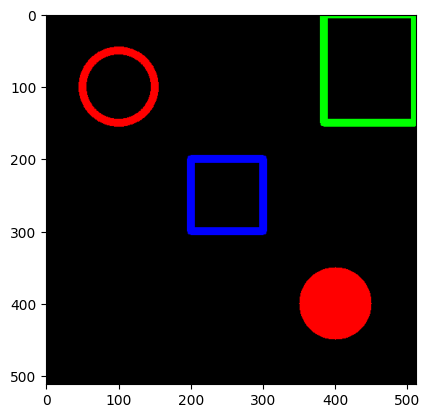

In [185]:
from textwrap import fill
cv.circle(black_img, center=(100,100), radius=50, color=(255,0,0), thickness=10)

cv.circle(black_img, center=(400,400), radius=50, color=(255,0,0), thickness=-1)

plt.imshow(black_img)

Kemudian dilakukan penambahan garis sesuai koordinat pt1 dan pt2 sebagai berikut.

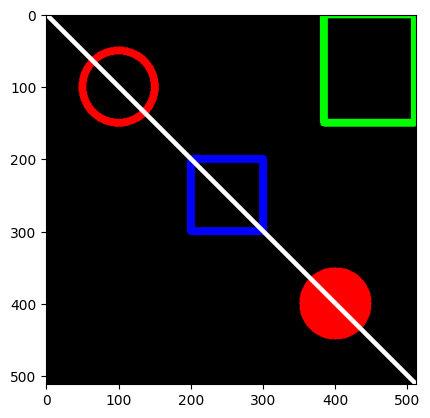

In [186]:
cv.line(black_img, pt1=(0,0), pt2=(512,512), color=(255,255,255), thickness=5)
plt.imshow(black_img)

Penambahan text dengan font yang telah tertulis dengan ukuran yang sudah ditentukan

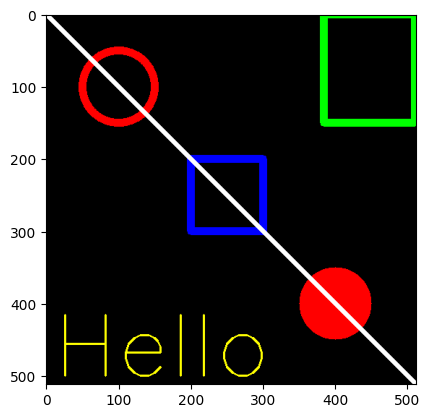

In [187]:
font = cv.FONT_HERSHEY_SIMPLEX
cv.putText(black_img, text='Hello', org=(10,500), fontFace=font, fontScale=4, color=(255,255,0), thickness=2, lineType=cv.LINE_AA)
plt.imshow(black_img)

Pembuatan black image kembali dilakukan dengan tipe data int32

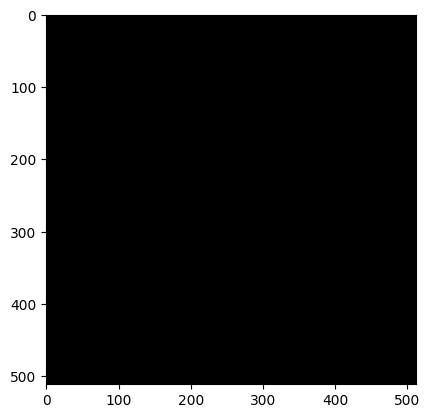

In [188]:
black_img2 = np.zeros((512,512,3), dtype=np.int32)
plt.imshow(black_img2)

inisialisasi NumPy array dengan tipe data int32

In [189]:
vertices = np.array([[100,300],[200,200],[400,300],[400,300],[200,400]], dtype=np.int32)
vertices


array([[100, 300],
       [200, 200],
       [400, 300],
       [400, 300],
       [200, 400]], dtype=int32)

Array tersebut kemudian di reshape sebagai berikut

In [190]:
pts = vertices.reshape((-1,1,2)) # nilai 2 untuk menunjukan bahwa tiap titik dibuat 3 channel yg mewakili R,G, dan B
pts

array([[[100, 300]],

       [[200, 200]],

       [[400, 300]],

       [[400, 300]],

       [[200, 400]]], dtype=int32)

Penambahan polyline pada black image kedua yang telah dibuat

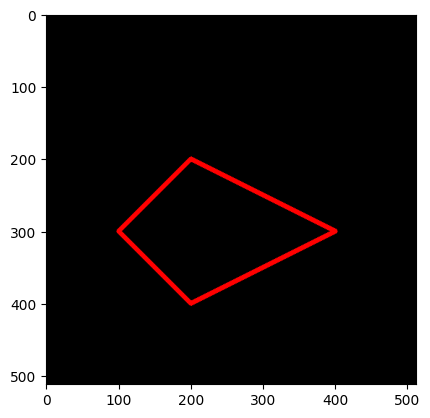

In [191]:
cv.polylines(black_img2, [pts], isClosed=True, color=(255,0,0), thickness=5)
plt.imshow(black_img2)
#

**Pertanyaan**
1. Apakah perbedaan gambar yang ditampilkan tanpa dan dengan matplotlib
2. Apakah perbedaan dan pengaruhnya pembuatan black image antara tipe data int16 dan int32?
3. Apakah kegunaan "google.colab.parches import cv2_imshow" pada potongan kode berikut
```
from google.colab.patches import cv2_imshow
from skimage import io
```
4. Apakah kegunaan "skimage import io" pada potongan kode soal nomor 3

**Jawab**
1. Gambar yang ditampilkan dengan matplotlib akan memiliki fitur tambahan seperti axes, ticks, dan labels, yang berguna untuk visualisasi data dan analisis.

  Gambar yang ditampilkan tanpa matplotlib, misalnya dengan cv2_imshow, hanya menampilkan gambar apa adanya.
2. Perbedaan tipe data int16 dan int32 terletak pada rentang nilai yang dapat ditampung.

  - int16 dapat menampung nilai dari -32768 hingga 32767.
  - int32 dapat menampung nilai dari -2147483648 hingga 2147483647.
Pengaruhnya pada pembuatan black image adalah jika operasi pada gambar menghasilkan nilai di luar rentang int16, akan terjadi overflow.

  Misalnya, operasi penjumlahan pada pixel bernilai tinggi.

  Dengan int32, rentang nilai yang lebih luas dapat mengakomodasi operasi tersebut dan mencegah overflow.
3. `from google.colab.patches import cv2_imshow` digunakan untuk mengimpor fungsi `cv2_imshow` yang digunakan untuk menampilkan gambar di Google Colab.

  Fungsi `cv2.imshow` dari OpenCV tidak berfungsi di Colab, sehingga perlu menggunakan `cv2_imshow`.

4. `from skimage import io` digunakan untuk mengimpor modul `io` dari library `skimage` yang menyediakan fungsi untuk membaca dan menulis gambar.

  `io.imread` dapat digunakan untuk membaca gambar dari berbagai format seperti JPG, PNG, TIFF, dll.


**E. Tugas**
1. Dengan menggunakan figsize, perhatikan apakah ukuran image pixelnya juga
berubah?
2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!
3. Tampilkan image baris ke 20-115, kolom 25-120!
4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!
5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image.
disarankan menggunakan bilangan acak/random!
6. Tampilkan image dengan posisi terbalik!

Berdasarkan praktikum bagian 3 dan 4 kerjakan beberapa tugas berikut :
7. Buat rectangle dan circle pada bagian wajah dari image foto anda saat
beraktifitas (bukan pasfoto).
8. Buat rectangle pada bagian sudut bawah kiri channel B pada color space RGB
dari citra kitten/ lena/ mandrill/ male/ female/ couple/ sailboat/ peppers!
9. Lengkapi tulisan nama file pada file citra dari soal no.8. gunakan font, ukuran
font, dan warna font yang sesuai keinginan anda.

**Jawab**

1. Dengan menggunakan figsize, ukuran gambar dalam pixel tidak berubah.

  figsize hanya mengubah ukuran figure atau canvas tempat gambar ditampilkan.

  Ukuran gambar dalam pixel tetap sama, tetapi gambar mungkin terlihat lebih besar atau lebih kecil di canvas tergantung pada figsize.



2. Tampilkan image dalam channel Red-Blue dan Green-Blue saja!

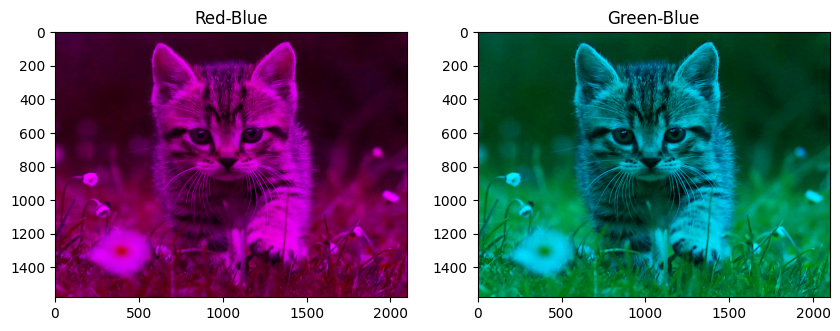

In [192]:
img6 = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# Salin gambar untuk menghindari modifikasi pada gambar asli
img_rb = img6.copy()
img_gb = img6.copy()

# Set channel Green menjadi 0 untuk Red-Blue
img_rb[:,:,1] = 0

# Set channel Red menjadi 0 untuk Green-Blue
img_gb[:,:,0] = 0

# Tampilkan gambar menggunakan matplotlib
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img_rb)
plt.title('Red-Blue')

plt.subplot(1,2,2)
plt.imshow(img_gb)
plt.title('Green-Blue')

plt.show()

3. Tampilkan image baris ke 20-115, kolom 25-120!

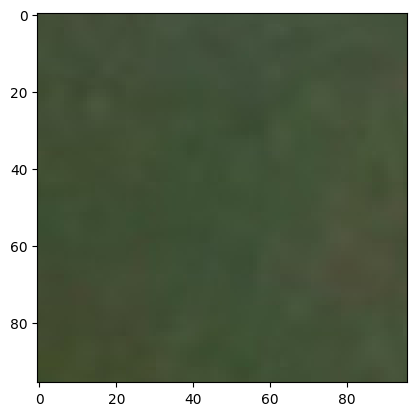

In [193]:
# Slice gambar untuk mengambil baris 20-115 dan kolom 25-120
sliced_img = img6[20:116, 25:121]

# Tampilkan gambar yang telah di-slice
plt.imshow(sliced_img)
plt.show()

4. Tampilkan image baris ke 5-30, semua kolom, channel Red saja!

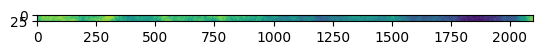

In [194]:
sliced_r_img = img6[5:31, :, 0]

plt.imshow(sliced_r_img)
plt.show()

5. Buat 5 kotak berbagai ukuran dan warna yang berbeda dalam satu image. disarankan menggunakan bilangan acak/random!

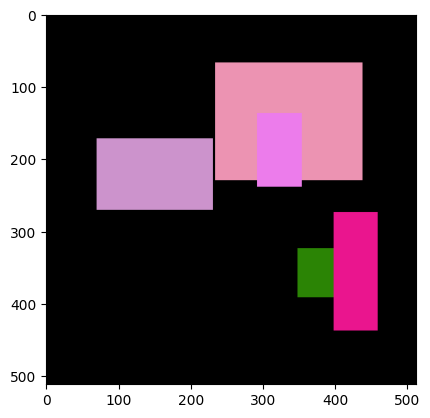

In [195]:
import random

# Buat gambar hitam
black_image = np.zeros((512,512,3), np.uint8)

# Buat 5 kotak dengan ukuran dan warna acak
for i in range(5):
  x1 = random.randint(0, 400)
  y1 = random.randint(0, 400)
  x2 = random.randint(x1+50, 512)
  y2 = random.randint(y1+50, 512)
  color = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
  cv.rectangle(black_image, (x1, y1), (x2, y2), color, -1)

# Tampilkan gambar
plt.imshow(black_image)
plt.show()

6. Tampilkan image dengan posisi terbalik!

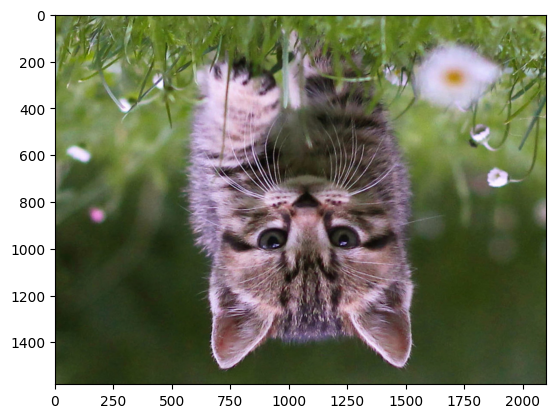

In [196]:
img7 = cv.flip(img6, -1)
plt.imshow(img7)

7. Buat rectangle dan circle pada bagian wajah dari image foto anda saat beraktifitas (bukan pasfoto).

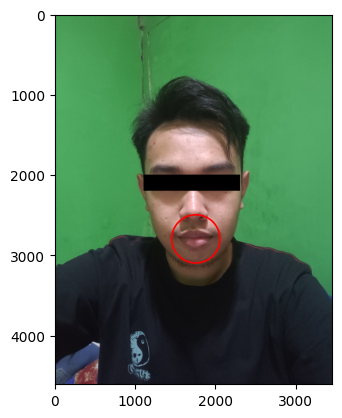

In [197]:
photo = cv.imread("/content/drive/MyDrive/PCVK_MM/Images/male.jpg")
photo = cv.cvtColor(photo, cv.COLOR_BGR2RGB)

# Membuat rectangle di bagian mata
cv.rectangle(photo, pt1=(1100,2000), pt2=(2300,2200), color=(0,0,0), thickness=-1)

# Membuat circle di bagian mulut
cv.circle(photo, center=(1750,2800), radius=300, color=(255,0,0), thickness=20)
plt.imshow(photo)

8. Buat rectangle pada bagian sudut bawah kiri channel B pada color space RGB

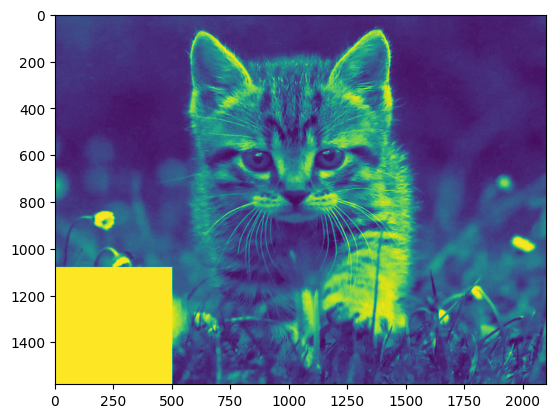

In [198]:
# Salin img6
img7 = img6.copy()

# Buat rectangle di sudut kiri bawah
cv.rectangle(img7, (0, img7.shape[0]-500), (500, img7.shape[0]), (255, 255, 255), -1)

# Ambil channel B
channel_b = img7[:, :, 2]

# Tampilkan channel B dengan rectangle
plt.imshow(channel_b)
plt.show()

9. Lengkapi tulisan nama file pada file citra dari soal no.8. gunakan font, ukuran font, dan warna font yang sesuai keinginan anda.

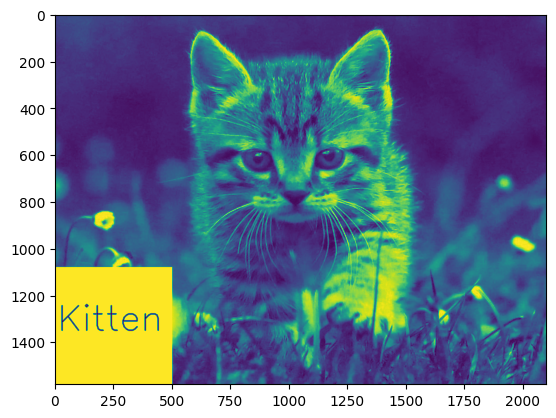

In [201]:
img8 = img7.copy()
font1 = cv.FONT_HERSHEY_SIMPLEX
cv.putText(img8, text='Kitten', org=(10,1350), fontFace=font1, fontScale=5, color=(0,0,0), thickness=4, lineType=cv.LINE_AA)
img8_b = img8[:,:,2].copy()
plt.imshow(img8_b)

**TUGAS**

Tutup tiap bagian tertentu dari kartu identitas tersebut menggunakan fungsi yang telah
Anda pelajari. Kreasikan terkait dengan warna dan ukuran dari bentuk-bentuknya.
- Kelompok 1 tutup bagian nomor NIK dan nama.
- Kelompok 2 tutup bagian TTL dan Jenis Kelamin.
- Kelompok 3 tutup bagian Gol. Darah dan TTD.
- Kelompok 4 tutup bagian Alamat dan Kecamatan.
- Kelompok 5 tutup bagian Agama dan Status Kawin. Kelompok 6 tutup Pekerjaan dan
kewarganegaraan.
- Kelompok 7 tutup bagian berlaku hingga dan foto.
- Kelompok 8 tutup bagian kabupaten dan tanggal dikeluarkan KTP yang ada dibagian
bawah foto.
- Kelompok 9 tutup bagian nama propinsi dan kabupaten di bagian paling atas KTP.
- Kelompok 10 tutup bagian RT/RW dan Kel/desa. Tutup menggunakan 2 kotak warna
yang berbeda.